In [1]:
#First we import the necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
import shutil

# Upload file interactively
uploaded = files.upload()

# Move the uploaded file to /content/sample_data
for filename in uploaded.keys():
    shutil.move(filename, '/content/sample_data/' + filename)

print("File uploaded and moved to /content/sample_data/")


df = pd.read_csv('/content/sample_data/RTA Dataset.csv')


Saving RTA Dataset.csv to RTA Dataset.csv
File uploaded and moved to /content/sample_data/


Shape of the dataset: (12316, 32)

Missing Values:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_seve

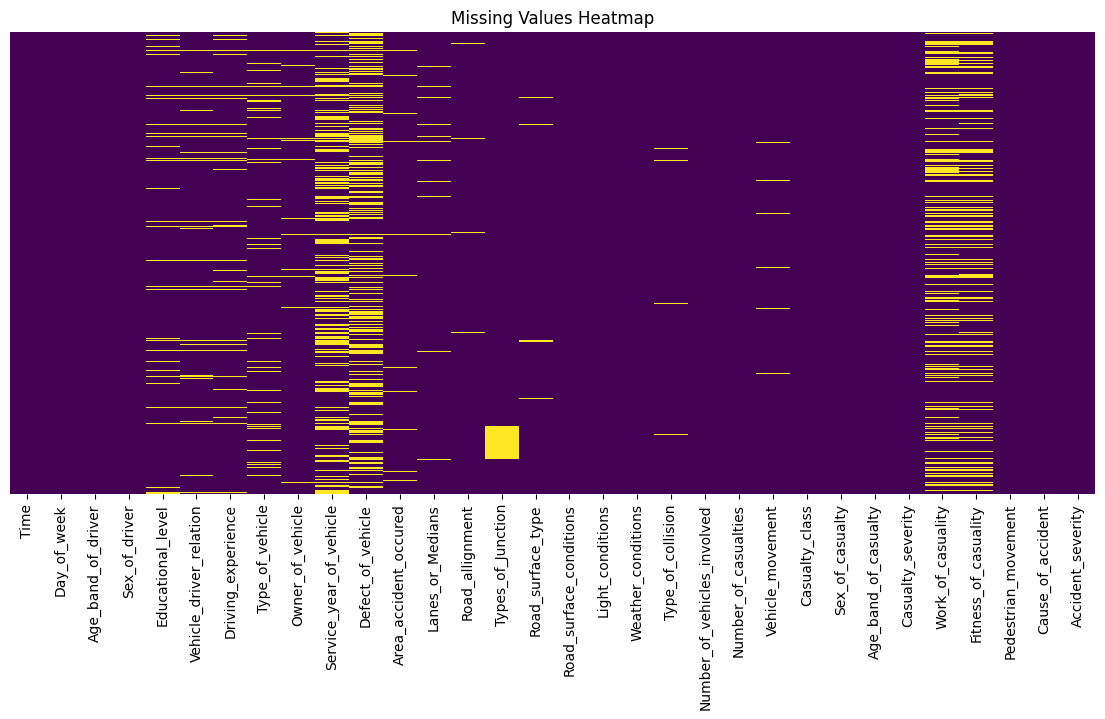

In [2]:
# We provide some general dataset info
print("Shape of the dataset:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [3]:
# Handling Missing Values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())


print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())



Missing values after cleaning:
0


In [4]:
# We then encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


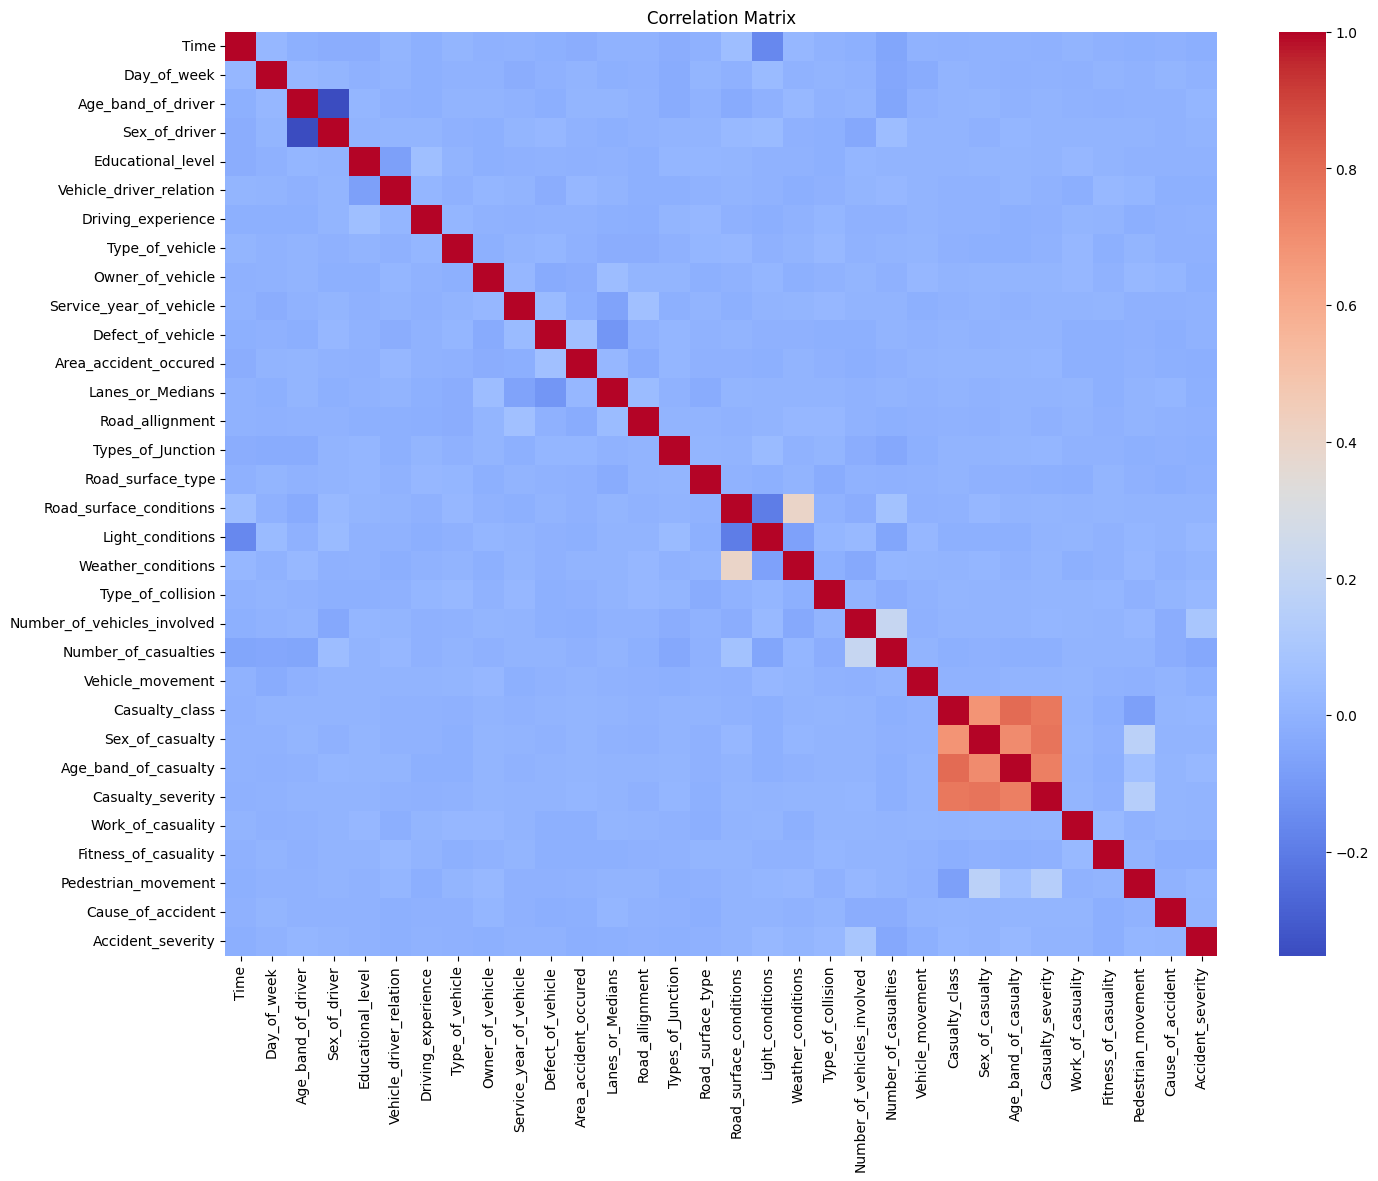

In [5]:
# Correlation Matrix
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


In [6]:
# Choosing PCA, Standardizing, PCA , train-test split
X = df.drop('Accident_severity', axis=1)  # <-- Update if your target column name differs
y = df['Accident_severity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
KNN Best CV Accuracy: 0.9336992895726424
KNN Test Accuracy: 0.7461434370771313

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.15      0.13        47
           1       0.20      0.21      0.20       523
           2       0.86      0.85      0.85      3125

    accuracy                           0.75      3695
   macro avg       0.39      0.40      0.39      3695
weighted avg       0.75      0.75      0.75      3695



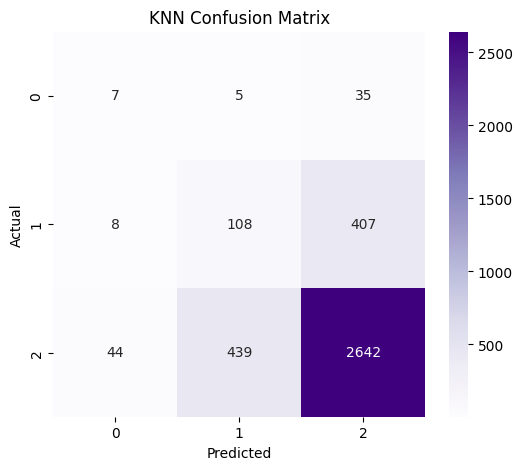

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 4. Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 5. Define KNN and parameter grid
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],  # moderate range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']  # exclude 'cosine' to avoid high dimensional issues
}
# 6. Grid search
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=4, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_bal, y_train_bal)

# 7. Best model
best_knn = grid_search_knn.best_estimator_

# 8. Predict & evaluate
y_pred_knn = best_knn.predict(X_test)

print("\nKNN Best Parameters:", grid_search_knn.best_params_)
print("KNN Best CV Accuracy:", grid_search_knn.best_score_)
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# 9. Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


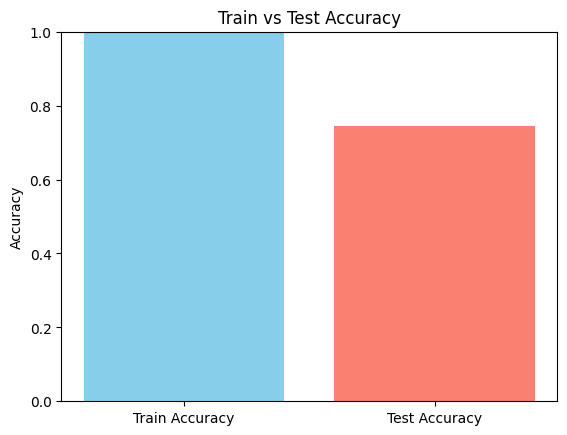

In [8]:
import numpy as np

# Convert y_train if needed
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

# Convert y_test if needed
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

train_acc = best_knn.score(X_train, y_train_labels)
test_acc = accuracy_score(y_test_labels, y_pred_knn)

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert cv_results_ to DataFrame
results_knn = pd.DataFrame(grid_search_knn.cv_results_)

# Plot mean test accuracy against n_neighbors for each (weight, metric) pair
plt.figure(figsize=(10, 6))

# Group by weights and metrics
for (weight, metric), group in results_knn.groupby(['param_weights', 'param_metric']):
    plt.plot(group['param_n_neighbors'], group['mean_test_score'], marker='o', label=f'{weight}, {metric}')

plt.title("KNN Cross-Validation Accuracy by n_neighbors")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Mean CV Accuracy")
plt.xticks(param_grid_knn['n_neighbors'])
plt.legend(title="Weights, Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
!pip install scikeras
!pip install scikeras --quiet


In [20]:
!pip install keras-tuner --quiet

import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    units = hp.Int('units', min_value=32, max_value=128, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])

    model.add(Dense(units, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units//2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='keras_tuning'
)

# Prepare train/val split
from sklearn.model_selection import train_test_split
X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(X, y, test_size=0.2, random_state=42)

tuner.search(X_train_tune, y_train_tune, epochs=10, validation_data=(X_val_tune, y_val_tune))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps.values)



Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.44999998807907104

Best val_accuracy So Far: 0.44999998807907104
Total elapsed time: 00h 00m 20s
Best hyperparameters: {'units': 128, 'dropout_rate': 0.30000000000000004, 'optimizer': 'rmsprop'}


In [27]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Define sets of parameters to try
param_grid = [
    {'learning_rate': 0.001, 'dropout1': 0.3, 'dropout2': 0.2, 'units1': 256, 'units2': 128},
    {'learning_rate': 0.0005, 'dropout1': 0.4, 'dropout2': 0.3, 'units1': 256, 'units2': 128},
    {'learning_rate': 0.0005, 'dropout1': 0.3, 'dropout2': 0.2, 'units1': 512, 'units2': 256},
    {'learning_rate': 0.0001, 'dropout1': 0.2, 'dropout2': 0.1, 'units1': 128, 'units2': 64},
]

results = []

for i, params in enumerate(param_grid):
    print(f"\n🔧 Training model {i+1} with params: {params}")

    model = Sequential([
        Dense(params['units1'], input_shape=(X_train.shape[1],), activation='relu'),
        BatchNormalization(),
        Dropout(params['dropout1']),
        Dense(params['units2'], activation='relu'),
        BatchNormalization(),
        Dropout(params['dropout2']),
        Dense(y_train.shape[1], activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred_probs = model.predict(X_test, verbose=0)
    y_pred = y_pred_probs.argmax(axis=1)
    y_true = y_test.argmax(axis=1)

    report = classification_report(y_true, y_pred, output_dict=True)
    f1_macro = report['macro avg']['f1-score']
    acc = accuracy_score(y_true, y_pred)

    results.append({
        'Params': params,
        'Accuracy': round(acc, 4),
        'F1_macro': round(f1_macro, 4)
    })

# Display results
df_results = pd.DataFrame(results)
print("\n📊 Model tuning results:")
print(df_results.sort_values(by='F1_macro', ascending=False))



🔧 Training model 1 with params: {'learning_rate': 0.001, 'dropout1': 0.3, 'dropout2': 0.2, 'units1': 256, 'units2': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔧 Training model 2 with params: {'learning_rate': 0.0005, 'dropout1': 0.4, 'dropout2': 0.3, 'units1': 256, 'units2': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔧 Training model 3 with params: {'learning_rate': 0.0005, 'dropout1': 0.3, 'dropout2': 0.2, 'units1': 512, 'units2': 256}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔧 Training model 4 with params: {'learning_rate': 0.0001, 'dropout1': 0.2, 'dropout2': 0.1, 'units1': 128, 'units2': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📊 Model tuning results:
                                              Params  Accuracy  F1_macro
2  {'learning_rate': 0.0005, 'dropout1': 0.3, 'dr...    0.9312    0.9310
0  {'learning_rate': 0.001, 'dropout1': 0.3, 'dro...    0.9078    0.9077
1  {'learning_rate': 0.0005, 'dropout1': 0.4, 'dr...    0.8743    0.8738
3  {'learning_rate': 0.0001, 'dropout1': 0.2, 'dr...    0.8174    0.8153


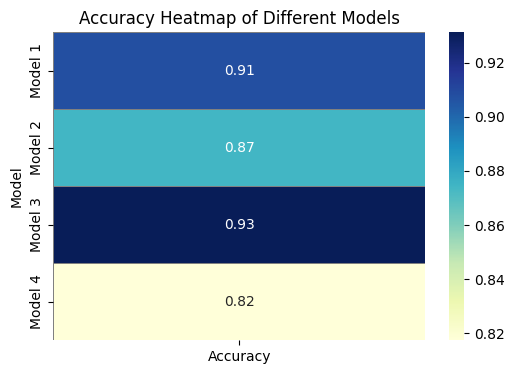

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your data as a DataFrame
data = {
    'Params': [
        "{'learning_rate': 0.001, 'dropout1': 0.3, 'dropout2': 0.2, 'units1': 256, 'units2': 128}",
        "{'learning_rate': 0.0005, 'dropout1': 0.4, 'dropout2': 0.3, 'units1': 256, 'units2': 128}",
        "{'learning_rate': 0.0005, 'dropout1': 0.3, 'dropout2': 0.2, 'units1': 512, 'units2': 256}",
        "{'learning_rate': 0.0001, 'dropout1': 0.2, 'dropout2': 0.1, 'units1': 128, 'units2': 64}",
    ],
    'Accuracy': [0.9078, 0.8743, 0.9312, 0.8174],
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4']
}

df = pd.DataFrame(data)

# Set 'Model' as index to make heatmap rows labeled
df.set_index('Model', inplace=True)

# Create a heatmap for accuracy only
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Accuracy']], annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Accuracy Heatmap of Different Models')
plt.show()


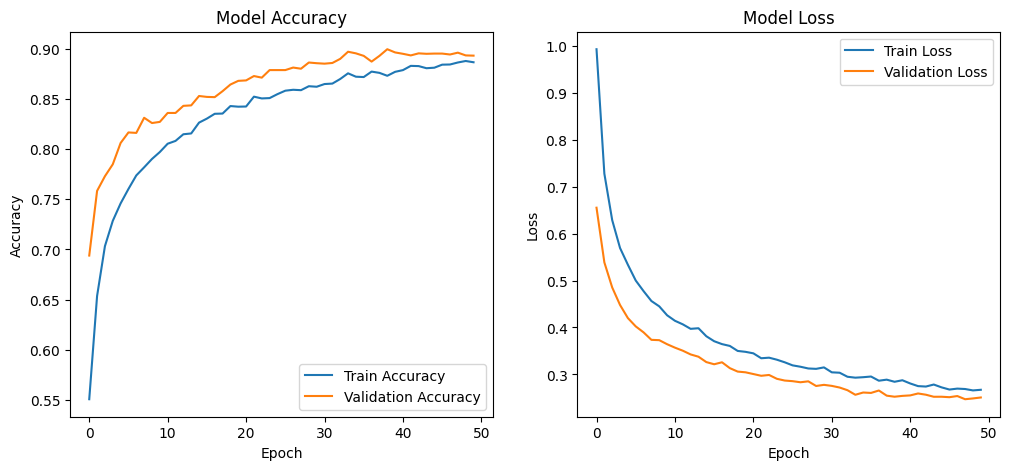

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
